In [2]:
%matplotlib inline
path = "data/redux/"
import utils; reload(utils)
from utils import *

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
batch_size = 64

## Creating Validation Set & Sample Set

In [5]:
%ls

data/      kaggle_cats-vs-dogs_redux.ipynb  utils.py   VGG16.ipynb  vgg16.pyc
dogscats/  redux.ipynb                      utils.pyc  vgg16.py


In [6]:
%cd data/redux
%ls

/home/ubuntu/nbs/data/redux
results/  sample_submission.csv  test.zip  train.zip
sample/   test/                  train/    valid/


In [7]:
%cd train

/home/ubuntu/nbs/data/redux/train


In [8]:
%mkdir ../valid

mkdir: cannot create directory ‘../valid’: File exists


In [9]:
%ls

cats/  dogs/


In [10]:
# Finds all files that have a .jpg
g=glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], '../valid/' + shuf[i])
print(shuf[500])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [ ]:
# A high level file operation that aids in file copying and removal
from shutil import copyfile

In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], '../sample/train/' + shuf[i])
print(shuf[100])

In [ ]:
%cd ../valid

In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], '../sample/valid/' + shuf[i])

## The next step is to move each set into seperate directories

In [ ]:
%cd ../valid
%ls

In [ ]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [ ]:
%cd ../train
%ls

In [ ]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [ ]:
%ls

In [ ]:
%cd ..
%ls
%cd ..
%ls

In [ ]:
%cd train

In [ ]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [ ]:
%cd ../valid

In [ ]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

In [ ]:
# To avoid "cheating" an unknown class is created for the test set
%cd ../test
%ls

In [ ]:
%cd ..
%ls

In [ ]:
%mkdir results

In [ ]:
%cd ..

In [ ]:
%cd ..
%ls

In [4]:
from vgg16 import Vgg16

In [5]:
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [6]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
vgg.model.save_weights(path+'results/ft1.h5')

In [ ]:
# Running for another epoch to improve accuracy
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
vgg.model.save_weights(path+'results/ft2.h5')

In [ ]:
vgg.model.optimizer.lr = 0.01

In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
vgg.model.save_weights(path+'results/ft2_1.h5')

In [7]:
vgg.model.load_weights(path+'results/ft2_1.h5')

## Creating a Submission Ready File

In [ ]:
%ls
%cd data/redux/test

In [ ]:
%mkdir unknown
%mv *.jpg unknown/

In [ ]:
%ls

In [ ]:
%cd unknown/

In [ ]:
%ls

In [ ]:
%cd ..

In [ ]:
%cd ..//..

In [ ]:
%cd ..

In [ ]:
%ls

In [8]:
batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [9]:
filenames = batches.filenames

In [10]:
preds[:5]

array([[  1.0000e+00,   1.8585e-28],
       [  8.0876e-01,   1.9124e-01],
       [  1.0000e+00,   6.8940e-12],
       [  1.0000e+00,   3.8232e-22],
       [  7.9564e-18,   1.0000e+00]], dtype=float32)

In [11]:
filenames[:5]

['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

In [12]:
save_array(path+'results/test_preds.dat', preds)
save_array(path+'results/filenames.dat', filenames)

In [13]:
preds = load_array(path+'results/test_preds.dat')
filenames = load_array(path+'results/filenames.dat')

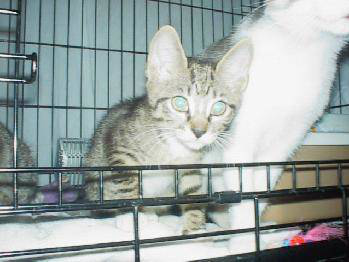

In [14]:
from PIL import Image
Image.open(path+'test/'+filenames[0])

In [15]:
isdog = preds[:,1]
isdog[:5]

array([  1.8585e-28,   1.9124e-01,   6.8940e-12,   3.8232e-22,   1.0000e+00], dtype=float32)

In [16]:
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[9292, 12026, 9688, 4392, 779]

In [17]:
subm = np.stack([ids, isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   1.8585e-28],
       [  1.2026e+04,   1.9124e-01],
       [  9.6880e+03,   6.8940e-12],
       [  4.3920e+03,   3.8232e-22],
       [  7.7900e+02,   1.0000e+00]])

In [19]:
np.savetxt('data/redux/subm1.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [20]:
from IPython.display import FileLink
FileLink('data/redux/subm1.csv')

/home/ubuntu/nbs/data/redux/subm1.csv

In [20]:
isdog = np.clip(preds[:,1], 0.05, 0.95)

In [21]:
isdog = preds[:,1]
isdog[:5]

array([  1.8585e-28,   1.9124e-01,   6.8940e-12,   3.8232e-22,   1.0000e+00], dtype=float32)

In [22]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 607s - loss: 0.2102 - acc: 0.9577 - val_loss: 0.0856 - val_acc: 0.9875

In [24]:
vgg.model.save_weights(path+'results/ft3.h5')

In [25]:
vgg.model.load_weights(path+'results/ft3.h5')

In [26]:
batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [27]:
filenames = batches.filenames

In [28]:
preds[:5]

array([[  1.0000e+00,   4.1447e-18],
       [  1.3793e-01,   8.6207e-01],
       [  1.0000e+00,   1.2330e-06],
       [  1.0000e+00,   2.7464e-14],
       [  3.8357e-15,   1.0000e+00]], dtype=float32)

In [29]:
filenames[:5]

['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

In [30]:
save_array(path+'results/test_preds2.dat', preds)

In [31]:
save_array(path+'results/filenames2.dat', filenames)

In [32]:
preds = load_array(path+'results/test_preds2.dat')
filenames = load_array(path+'results/filenames2.dat')

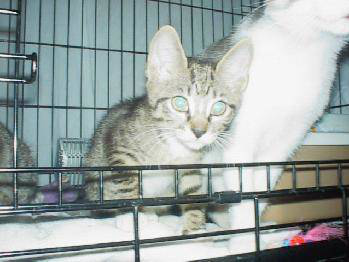

In [34]:
Image.open(path+'test/'+filenames[0])

In [35]:
isdog = preds[:,1]
isdog[:5]

array([  4.1447e-18,   8.6207e-01,   1.2330e-06,   2.7464e-14,   1.0000e+00], dtype=float32)

In [36]:
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[9292, 12026, 9688, 4392, 779]

In [37]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   4.1447e-18],
       [  1.2026e+04,   8.6207e-01],
       [  9.6880e+03,   1.2330e-06],
       [  4.3920e+03,   2.7464e-14],
       [  7.7900e+02,   1.0000e+00]])

In [38]:
np.savetxt('data/redux/subm2.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [39]:
from IPython.display import FileLink
FileLink('data/redux/subm2.csv')

/home/ubuntu/nbs/data/redux/subm2.csv

# Visualizing results

In [40]:
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [41]:
labels = val_batches.classes
filenames = val_batches.filenames

In [42]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

array([ 1.    ,  0.9982,  0.9081,  1.    ,  1.    ,  1.    ,  0.9984,  1.    ], dtype=float32)

In [43]:
preds[:8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [44]:
n_view =4

In [45]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

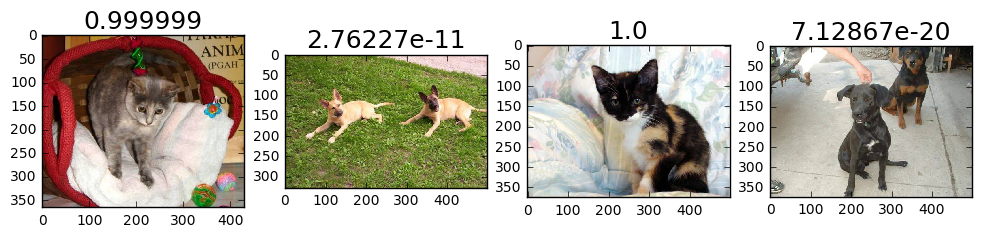

In [46]:
#1. A few correct labels at random
correct = np.where(preds==labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

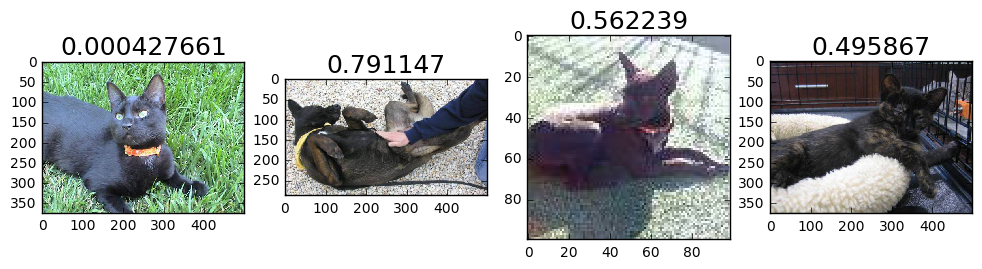

In [47]:
incorrect = np.where(preds!=labels)[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

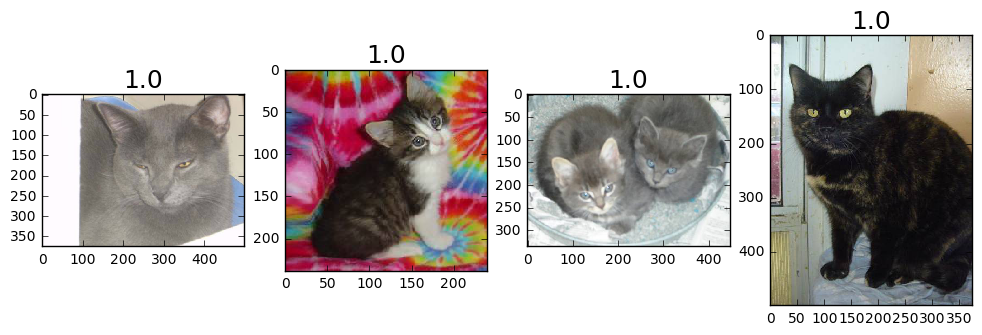

In [48]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==labels))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

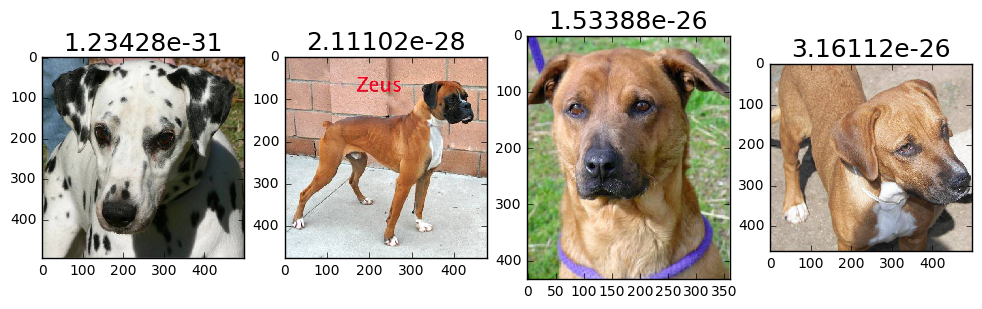

In [49]:
# as above, but dogs
correct_dogs = np.where((preds==1) & (preds==labels))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], probs[correct_dogs][most_correct_dogs])

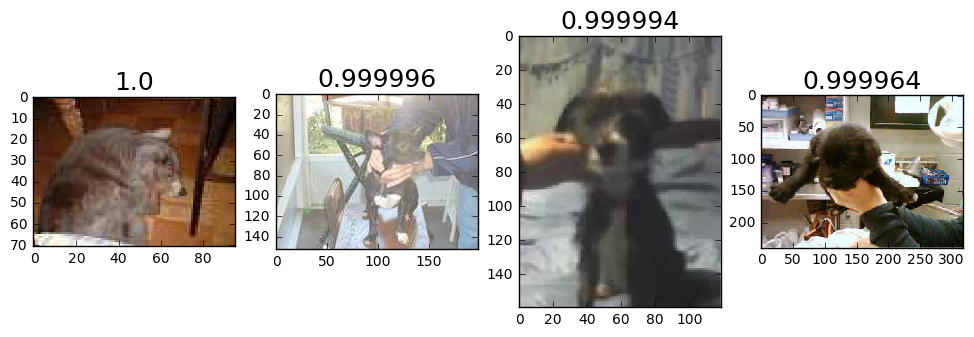

In [50]:
#3. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((preds==0) & (preds!=labels))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

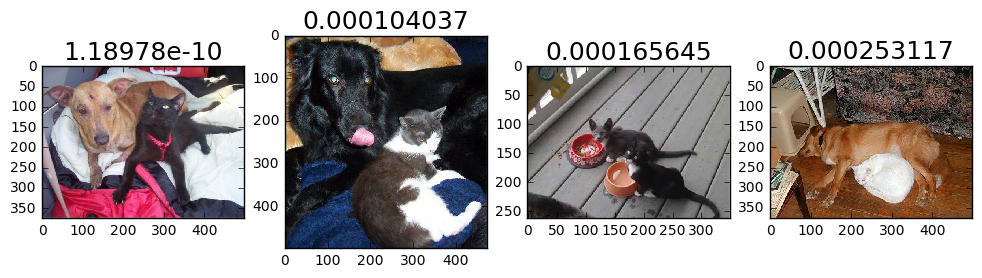

In [51]:
#3. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((preds==1) & (preds!=labels))[0]
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[:n_view]
plots_idx(incorrect_dogs[most_incorrect_dogs], probs[incorrect_dogs][most_incorrect_dogs])

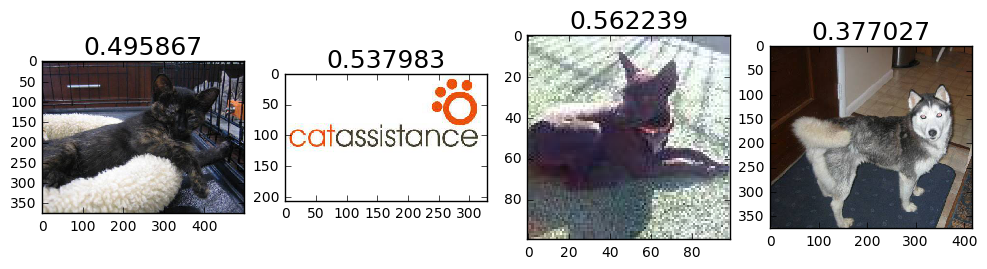

In [52]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [53]:
cm = confusion_matrix(labels, preds)

[[1001   10]
 [  15  974]]


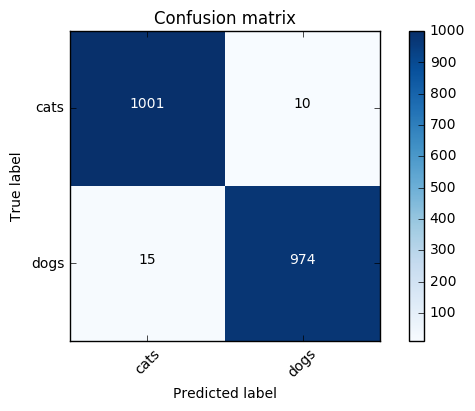

In [54]:
plot_confusion_matrix(cm, val_batches.class_indices)